# Classification technique on the Breast Cancer dataset

## Setup

In [1]:
%matplotlib inline
# import necessary libraries and specify that graphs should be plotted inline. 
from sklearn.datasets import load_breast_cancer
from sklearn import tree,linear_model,neighbors, datasets
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.utils.multiclass import unique_labels
from sklearn.exceptions import ConvergenceWarning
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Ignoring warnings for clean output
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
#Code to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        ""
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True',
           xlabel='Predicted')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

## Loading and Exploring the data

In [4]:
# load the data set
bc = load_breast_cancer()
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [5]:
## Explore the data set
n_samples, n_features = bc.data.shape
print(bc.keys())
print ('The dimensions of the data set are ', n_samples, 'by', n_features)
print()
print(bc.data.shape)
print(bc.target.shape)
print()
print('The classes are: \n', bc.target_names)
print()
print('The features in the data set are:\n', bc.feature_names)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
The dimensions of the data set are  569 by 30

(569, 30)
(569,)

The classes are: 
 ['malignant' 'benign']

The features in the data set are:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


## 1.Decision Trees 

### Modeling

Initialized the classifier with hyper-parameter **max_depth = 3** as the starting point as the Wisconsin Diagnostic Breast Cancer names file mentions that the best accuracy was received using 3 parameters - Worst Area, Worst Smoothness and Mean Texture

In [6]:
# We start with initializing our classifier.
clf = tree.DecisionTreeClassifier(max_depth = 3)

Accuracy: 94.15%

Classification Report: - 
               precision    recall  f1-score   support

           0       0.95      0.88      0.92        68
           1       0.94      0.97      0.96       120

   micro avg       0.94      0.94      0.94       188
   macro avg       0.94      0.93      0.94       188
weighted avg       0.94      0.94      0.94       188



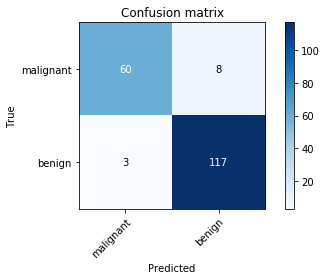

In [7]:
## Train the model (fit the data)
X_train, X_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.33,random_state=45)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy: {0:.2%}".format(accuracy_score(y_test, y_pred)))
print()
plot_confusion_matrix(y_test, y_pred, classes=bc.target_names,
                      title='Confusion matrix')
print("Classification Report: - \n",classification_report(y_test, y_pred))

In [8]:
# After being fitted, the model can then be used to predict the class of samples:
print('The 1st instance is predicted to belong to class:', clf.predict(bc.data[:1, :]))
# Here we predict the class of a single value

# Alternatively, the probability of each class can be predicted, which is the fraction of training samples of the same class in a leaf:
print('The probabilities of belonging to each one of the classes are estimated as:', clf.predict_proba(bc.data[:1, :]))
# Here you can see the probability of each one of the classes

The 1st instance is predicted to belong to class: [0]
The probabilities of belonging to each one of the classes are estimated as: [[1. 0.]]


Hyper-parameter max_depth = 3 gives us a Accuracy of 94.15%.

Accuracy can be deceiving as it doesn't take into account false negatives. Being a medical case, breast cancer classification should minimize false negatives as this can lead lead to a persons death.

I am selecting F1-score for selecting the best estimator because it is a better measure than accuracy as this score takes both false positives and false negatives into account.

We get a weighted f1 score of 94% using this model which is a good starting point. Lets see if this can be improved by tuning the hyper parameters.

### Tuning the hyper-parameters

Now we see what is the best max-depth for maximizing accuracy in the test data. 

The **max-depth** of a tree defines the number of features used to classify the data. Using very few features would result in underfitting and using a lot of features would lead to over-fitting.

We also look at both criterions **gini** and **entropy** to see which gives us a better accuracy

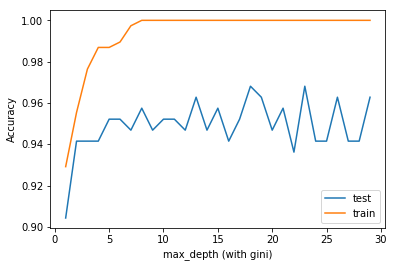

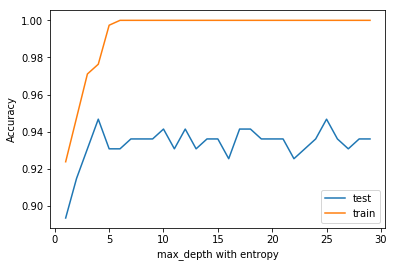

In [9]:
# Optimize decision tree and detect (potential) over-fitting
complexity_values = range(1,30)

X_train, X_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.33, random_state=45)

train_accuracies = []
test_accuracies=[]

for complexity_value in complexity_values:
    clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=complexity_value)
    test_accuracies.append(clf.fit(X_train, y_train).score(X_test, y_test))
    train_accuracies.append(clf.fit(X_train, y_train).score(X_train, y_train))
    
# We want to plot our results
line1, =plt.plot(complexity_values, test_accuracies,label='test_accuracies')
line2, =plt.plot(complexity_values, train_accuracies,label='train_accuracies')
plt.xlabel("max_depth (with gini)")
plt.ylabel("Accuracy")
plt.legend((line1, line2), ('test', 'train'))
plt.show()

train_accuracies = []
test_accuracies=[]

for complexity_value in complexity_values:
    clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=complexity_value)
    test_accuracies.append(clf.fit(X_train, y_train).score(X_test, y_test))
    train_accuracies.append(clf.fit(X_train, y_train).score(X_train, y_train))
    
# We want to plot our results
line1, =plt.plot(complexity_values, test_accuracies,label='test_accuracies')
line2, =plt.plot(complexity_values, train_accuracies,label='train_accuracies')
plt.xlabel("max_depth with entropy")
plt.ylabel("Accuracy")
plt.legend((line1, line2), ('test', 'train'))
plt.show()

We plot a graph of train and test accuracy w.r.t max_depth and we can see that accuracy for the test data is maximum and close to the training data at **max_depth = 5 & criterion = "gini"**

**Underfitting** : If we use max_depth = 1, this would be under-fitting as we are using only one parameter to classify the the data. As seen in the above graph, our test and train accuracies are pretty low when max_depth is lower (1/2)

**Overfitting** : If our max_depth is large i.e greater than 6, we see 100% accuracy in the training data but the accuracy for test data is fluctuating. This is a case of over-fitting so we definitely want the max deph to be less than 6, and max_depth = 4 satisfies this condition.

### Cross Validation with max_depth = 5 & criterion = "gini"

In [13]:
#Selecting max_depth = 5 and criterion = "gini"
X_train,X_test,y_train,y_test = train_test_split(bc.data, bc.target,test_size=0.33, random_state=45)
clf = tree.DecisionTreeClassifier(criterion="gini", max_depth = 5)
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_test, y_test, cv=5)
print("Accuracy: {0:.2%} +/- {1:.2%}".format(scores.mean(), scores.std() * 2))
print('The 1st instance is predicted to belong to class:', clf.predict(bc.data[:1, :]))
print('The probabilities of belonging to each one of the classes are estimated as:', clf.predict_proba(bc.data[:1, :]))

Accuracy: 92.05% +/- 4.58%
The 1st instance is predicted to belong to class: [0]
The probabilities of belonging to each one of the classes are estimated as: [[1. 0.]]


Hyper-parameter **max_depth = 5** gives us a **Accuracy of 92.05% +/- 4.58%** using a 5 fold cross-validation which is lesser than max_depth = 3 (which is 94.15%).
So these might not be the best parameters to chose as they have a high standard deviation of 4.58%

### Tuning parameters further with grid search

To search for the best parameters, we run a grid search with the following hyper parameters

1. criterion : to find an optimal criterion to calculate impurity of a node
2. max_depth : to search for the optimal number of features used for classification. Setting the right value for the max_depth (i.e. the number of features used for classification) is crucial to avoid overfitting or underfitting
3. min_samples_leaf : to search for the optimal minimum number of samples required to form a leaf
4. min_impurity_decrease : to search for the optimal minimum impurity decrease to split a node. If this split induces a decrease of the impurity greater than or equal to min_impurity_decrease only then the split will happen. This prevents splits where information gain is very low.

Being a medical case, breast cancer classification should **minimize false negatives** as this can lead lead to a persons death.

I am selecting **F1-score** for selecting the best estimator because it is a better measure than accuracy as this score takes both false positives and false negatives into account. 

In [14]:
X_train,X_test,y_train,y_test = train_test_split(bc.data, bc.target,test_size=0.33,random_state=45)
param_grid = dict(criterion = ["gini", "entropy"], 
                  max_depth = range(1,15),
                  min_samples_leaf = range(1,10),
                  min_impurity_decrease = [0,1e-8,1e-7,1e-6,1e-5,1e-4]
                 )
print (param_grid)
grid_tree_clf = tree.DecisionTreeClassifier()
grid = GridSearchCV(grid_tree_clf, param_grid, cv = 5, scoring='f1')
grid.fit(X_train,y_train)

{'criterion': ['gini', 'entropy'], 'max_depth': range(1, 15), 'min_samples_leaf': range(1, 10), 'min_impurity_decrease': [0, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001]}


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(1, 15), 'min_samples_leaf': range(1, 10), 'min_impurity_decrease': [0, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

Using grid search, we acheive hyper parameters with accuracy of 95.67%

The best hyper-parameters to get these accuracy are :-
 {'criterion': 'gini', 'max_depth': 3, 'min_impurity_decrease': 1e-07, 'min_samples_leaf': 4}

The best decision tree classifier is :-
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=1e-07, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Classification Report: - 
               precision    recall  f1-score   support

           0       0.95      0.88      0.92        68
           1       0.94      0.97      0.96       120

   micro avg       0.94      0.94      0.94       188
   macro avg       0.94      0.93      0.94       188
weighted avg       0.94      0.94      0.94       188



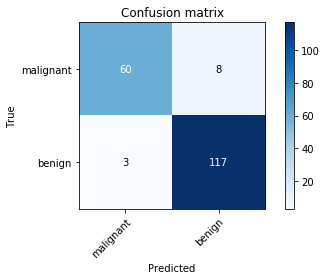

In [15]:
print ("Using grid search, we acheive hyper parameters with accuracy of {0:.2%}".format(grid.best_score_))
print()
print ("The best hyper-parameters to get these accuracy are :-\n", grid.best_params_)
print()
print ("The best decision tree classifier is :-\n", grid.best_estimator_)
y_pred = grid.best_estimator_.predict(X_test)
plot_confusion_matrix(y_test, y_pred, classes=bc.target_names,
                      title='Confusion matrix')
print("Classification Report: - \n",classification_report(y_test, y_pred))

### Results - Model Goodness

**Model Goodness**
The class distribution is 357 benign, 212 malignant, which would get us an accuracy of 357/(357+212) = 62.74% by majority rule, so an **Accuracy of 95.67%** by decision tree classification is a good model.

Our model was chosen based of **f1-score which is 94%** which is the harmonic mean of precision and recall and hecne a good measure to determine a good fit.

False Negatives can be a problem since it is a medical case and we would like to minimize the number of **false negatives which is 8** in this case.

Therefore, the following Hyperparameters, 'criterion': 'gini', 'max_depth': 3, 'min_impurity_decrease': 1e-07, 'min_samples_leaf': 4 help us increase the accuracy to 95.67%, while maintaining the same f1 score of 94%.

## 2.K-Nearest Neighbours

### Modeling

We start by looking at the test data and training data accuracies for number of neighbours from 1 to 30.

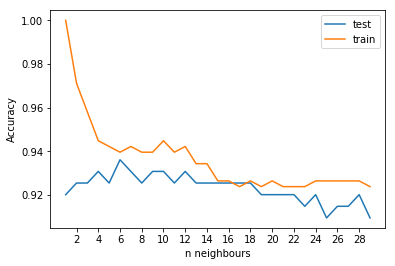

In [16]:
n_neighbors = range(1,30)

# KNeighborsClassifier is implementing the k-nearest neighbors vote
X_train, X_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.33, random_state = 45)

train_accuracies = []
test_accuracies=[]

for n in n_neighbors:
    clf = neighbors.KNeighborsClassifier(n)
    test_accuracies.append(clf.fit(X_train, y_train).score(X_test, y_test))
    train_accuracies.append(clf.fit(X_train, y_train).score(X_train, y_train))    

# We want to plot our results
line1, =plt.plot(n_neighbors, test_accuracies,label='test_accuracies')
line2, =plt.plot(n_neighbors, train_accuracies,label='train_accuracies')
plt.xlabel("n neighbours")
plt.ylabel("Accuracy")
plt.xticks(range(2,30,2))
plt.legend((line1, line2), ('test', 'train'))
plt.show()

We see that the test and train data accuracies converge at **n = 6 neighbours**. So we use 6 nearest neighbours as a starting point for our K Nearest Neighbours classifier

**Overfitting** : If the classification is done based on very few neighbours (1 or 2), we see that the training data accuracy is very high but test data accuracy is very low. This indicates over-fitting as items are classified based on very few neighbours and classifcation may be done based on few outliers resulting in no definite boundaries for classification.

**Underfitting** : Using a high number of neighbours to classify can lead to underfitting. An extreme case of this would be where all the samples are looked at for fitting which would lead to a naive (majority) rule classification.

### Cross Validation with n (neighbours) = 6

In [18]:
X_train,X_test,y_train,y_test = train_test_split(bc.data, bc.target,test_size=0.33,random_state=45)

# Chosing n = 6 neighbours
n = 6
clf = neighbors.KNeighborsClassifier(n)
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_test, y_test, cv=5)
print("Accuracy: {0:.2%} +/- {1:.2%}".format(scores.mean(), scores.std() * 2))
print('The 1st instance is predicted to belong to class:', clf.predict(bc.data[:1, :]))
print('The probabilities of belonging to each one of the classes are estimated as:', clf.predict_proba(bc.data[:1, :]))

Accuracy: 91.47% +/- 4.18%
The 1st instance is predicted to belong to class: [0]
The probabilities of belonging to each one of the classes are estimated as: [[1. 0.]]


Hyper-parameter **6 nearest neighbouts** gives us a **Accuracy of 91.47% +/- 4.18%** using a 5 fold cross-validation which is better than that received by Grid Search Cross Validation using Decision trees.

However, the **standard deviation of 4.18% in accuracy scores is very high** and so this model might not be a good fit.

### Tuning parameters further with grid search

To search for the best parameters, we run a grid search with the following hyper parameters

1. weights : To check whether assigneing **uniform weights or weights based on distance** give a us better model. 
2. n_neighbors : As defined earlier, it is crucial to select an optimal number of neighbours to run the classification model.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.33,random_state=45)
k_range = list(range(1,30))
weight_options = ["uniform", "distance"]
param_grid = dict(n_neighbors = k_range, weights = weight_options)
print (param_grid)
grid_knn_clf = neighbors.KNeighborsClassifier()
grid = GridSearchCV(grid_knn_clf, param_grid, cv = 5, scoring='f1')
grid.fit(X_train,y_train)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'weights': ['uniform', 'distance']}


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

Using grid search, we acheive hyper parameters with accuracy of 94.71%

The best hyper-parameters to get these accuracy are :-
 {'n_neighbors': 18, 'weights': 'uniform'}

The K-Nearest Neighbours classifier is :-
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=18, p=2,
           weights='uniform')
Classification Report: - 
               precision    recall  f1-score   support

           0       0.95      0.84      0.89        68
           1       0.91      0.97      0.94       120

   micro avg       0.93      0.93      0.93       188
   macro avg       0.93      0.91      0.92       188
weighted avg       0.93      0.93      0.92       188



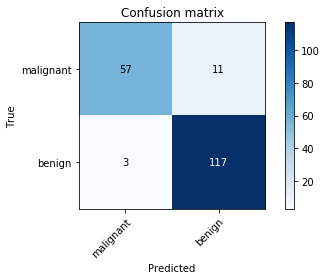

In [22]:
print ("Using grid search, we acheive hyper parameters with accuracy of {0:.2%}".format(grid.best_score_))
print()
print ("The best hyper-parameters to get these accuracy are :-\n", grid.best_params_)
print()
print ("The K-Nearest Neighbours classifier is :-\n", grid.best_estimator_)
y_pred = grid.best_estimator_.predict(X_test)
plot_confusion_matrix(y_test, y_pred, classes=bc.target_names,
                      title='Confusion matrix')
print("Classification Report: - \n",classification_report(y_test, y_pred))

### Results - Model Goodness

**Model Goodness**
The class distribution is 357 benign, 212 malignant, which would get us an accuracy of 357/(357+212) = 62.74% by majority rule, so an **Accuracy of 94.71%** by k nearest neighbours is a good model.

However, we see that **f1-score which is 92%** in this model with {'n_neighbors': 18, 'weights': 'uniform'} which is the harmonic mean of precision and recall and is lesser compared to decision trees. 

False Negatives can be a problem since it is a medical case and we would like to minimize the number of **false negatives which is 11** in this case.

So far, the accuracy is almost similar to the one acheived by the decision tree classifier, however decision tree classifier has a lower number of false negatives.

## 3.Logistic regression

### Modeling

As a starting point, we run the Logistic regression classifer with an L1 penalty as a hyper parameter. This is used of regularization of the co-efficients. L1 is useful as it can push feature coefficients to 0, creating a method for feature selection.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.33,random_state=45)
clf = linear_model.LogisticRegression(penalty='l1')
clf.fit(bc.data, bc.target)
scores = cross_val_score(clf, X_test, y_test, cv=5)
print("Accuracy: {0:.2%} +/- {1:.2%}".format(scores.mean(), scores.std() * 2))
print('The 1st instance is predicted to belong to class:', clf.predict(bc.data[:1, :]))
print('The probabilities of belonging to each one of the classes are estimated as:', clf.predict_proba(bc.data[:1, :]))

Accuracy: 94.67% +/- 3.47%
The 1st instance is predicted to belong to class: [0]
The probabilities of belonging to each one of the classes are estimated as: [[1.0e+00 1.8e-14]]


### Cross Validation

Classification Report: - 
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        68
           1       0.95      0.98      0.97       120

   micro avg       0.96      0.96      0.96       188
   macro avg       0.96      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188



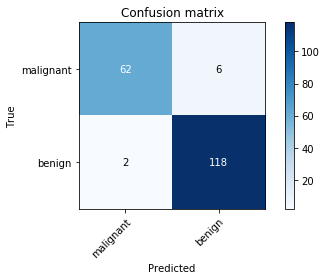

In [24]:
y_pred = clf.predict(X_test)
plot_confusion_matrix(y_test, y_pred, classes=bc.target_names,
                      title='Confusion matrix')
print("Classification Report: - \n",classification_report(y_test, y_pred))

### Goodness of fit

Hyper-parameter **penalty='l1'** gives us a **94.67% +/- 3.47%** using a 5 fold cross-validation which is a **good balance** between maximizing accuracy and minimizing standard deviation as compared to the models we have so far.

The **false negative cases is reduced to 6** which is good fit compared to all models so far.

We also have a **high precision, recall and f-score.**

The f-score is 96% which is the highest among all models so far.

**Overfitting**
Logistic regression is a linear model and overfitting can occur when the model is very complex, i.e. having too many parameters relative to the number of observations. A model that has been overfit has poor predictive performance, as it overreacts to minor fluctuations in the training data.

To avoid overfitting, we use regularization. There are two typees of regularization, L1 and L2 and we check both of these as well as regularization strength using grid search.

### Tuning parameters further with grid search

To search for the best parameters, we run a grid search with the following hyper parameters

1. penalty : To check whether l1 or l2 penalty gives us a better result. 
2. C : We also check what is an optimal value for regularization strength. The hyper-parameter 'C' is 1 / lambda (which is an inverse of the penalty or regularization strength.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.33,random_state=45)
#Grid Search
clf = linear_model.LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'], \
               'C':[1e-4,0.001,.009,0.01,.09,1,5,10,25,100,1000,1e4]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, cv=5)
grid_clf_acc.fit(X_train, y_train)
y_pred_acc = grid_clf_acc.predict(X_test)

In [26]:
print("Best parameters and estimator set found on development set:")
print()
print(grid_clf_acc.best_params_)
print (grid_clf_acc.best_estimator_)
print("Grid scores on development set:")
print()
means = grid_clf_acc.cv_results_['mean_test_score']
stds = grid_clf_acc.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_clf_acc.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Best parameters and estimator set found on development set:

{'C': 1000, 'penalty': 'l2'}
LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
Grid scores on development set:

0.378 (+/-0.006) for {'C': 0.0001, 'penalty': 'l1'}
0.924 (+/-0.044) for {'C': 0.0001, 'penalty': 'l2'}
0.916 (+/-0.036) for {'C': 0.001, 'penalty': 'l1'}
0.927 (+/-0.035) for {'C': 0.001, 'penalty': 'l2'}
0.924 (+/-0.035) for {'C': 0.009, 'penalty': 'l1'}
0.932 (+/-0.041) for {'C': 0.009, 'penalty': 'l2'}
0.924 (+/-0.035) for {'C': 0.01, 'penalty': 'l1'}
0.932 (+/-0.041) for {'C': 0.01, 'penalty': 'l2'}
0.927 (+/-0.042) for {'C': 0.09, 'penalty': 'l1'}
0.937 (+/-0.080) for {'C': 0.09, 'penalty': 'l2'}
0.950 (+/-0.072) for {'C': 1, 'penalty': 'l1'}
0.950 (+/-0.072) for {'C': 1, 'penalty': 'l2'}
0.953 (+/-

### Goodness of fit



Using grid search, we acheive hyper parameters with accuracy of 94.71%
Classification Report: - 
               precision    recall  f1-score   support

           0       0.97      0.90      0.93        68
           1       0.94      0.98      0.96       120

   micro avg       0.95      0.95      0.95       188
   macro avg       0.96      0.94      0.95       188
weighted avg       0.95      0.95      0.95       188



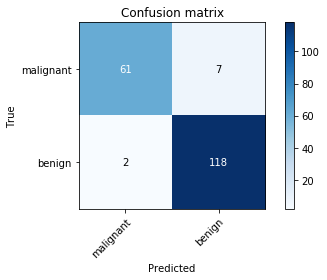

In [27]:
# New Model Evaluation metrics 
print ("Using grid search, we acheive hyper parameters with accuracy of {0:.2%}".format(grid.best_score_))
print("Classification Report: - \n",classification_report(y_test, y_pred_acc))
#Logistic Regression (Grid Search) Confusion matrix
plot_confusion_matrix(y_test, y_pred_acc, classes=bc.target_names,
                      title='Confusion matrix')

Logistic regression grid search with a 5 fold cross validation tells us that the best parameters are **C: 1000, penalty: 'l2'**

This gives us a high precision and recall of 95%, accuracy of 94% and a **very good f1-score of 95%** which is the highest so far.

To avoid overfitting, we use regularization by a L2 penalty and a C parameter value = 1000. Using this, we get an accuracy of 94.71%. Our grid search data also tells us that these parameters maximize accuracy and minimize standard deviation.  94.67% +/- 3.47%.

## Model Selection and Tuning

**Comparing all the models that have been analysed so far:-**

| Model | Best Parameters (Using GridSearchCV) | Accuracy | F1 Score | Number of False Negatives |
| :--- | :---: | ---: | ---: | ---: |
| Decision Tree | criterion: gini, max_depth: 3, min_impurity_decrease: 1e-07, min_samples_leaf: 4 | **95.67%** | 94% | 8 |
| K Nearest Neighbours | n_neighbors: 18, weights: uniform | 94.71% | 92% | 11 |
| **Logistic Regression** | C: 1000 penalty: l2 | 94.71% | **95%** | **7** |

Even though **Decision Tree** gives us the highest accuracy of 95.67%, it is more important to look at F Score which is a harmonic mean of precision and recall and provides a good balance between these to provide a good accuracy measure. **Logistic Regression** gives us the highest F Score of 95% with a decently good accuracy of 94.71%.

Being a medical case, **False Negatives** can be a big problem as it is a matter of life and death.  **Logistic Regression** with C: 1000 penalty: l2 hyper parameters, also acheives a minimum number of false negatives (of 7) as seen in the confusion matrix. For these results, we use regularization by a L2 penalty and a C parameter value = 1000.

Even though we get a high accuracy of 94.71% with **K Nearest Neighbours** classification, the F1 Score is lower than other model (92%) as well as a high number of False Negatives which is bad.

Based on the above analyses, we can conculde that among the 3 models discussed, Logistic regression gives us a good fit for classifying breast cancer cells and **malignant or benign**. 